# Numerical exercise
Kristine Schüller and Sigrid Aunsmo

In [62]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt 

#for animasjon
import matplotlib.animation as animation
#%matplotlib notebook #bruke denne ved animasjon?
%matplotlib inline


#defining constants which will be the same in all problems 
h_bar=1
m=1
k_0=20
L=20
t_0=0   
"""Bruker vi t_0???????????"""

#plotting parameters 
fontsize=15
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (15, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.0}
plt.rcParams.update(newparams)


## problem 1

To be able to study the propagation of a wave packet we first need to find the inital wave function. This is done by using Eq 8 from the exercise sheet: 

$\Psi(x,t) = C e^{ \frac{(x-x_s)^2}{2 \sigma_x^2} } e^{i(k_0x-\omega t)},$

where C is just a normalization constant such that 

$
\int_0^L |\Psi(x,t)|^2 dx = 1
$

In the numerical propagation of the wave packet we want to split $\Psi$ into a real and an imaginary part.  

$
\Psi_I = C e^{ \frac{(x-x_s)^2}{2 \sigma_x^2} } \sin(k_0 x-\omega t)
$

$
\Psi_R = C e^{ \frac{(x-x_s)^2}{2 \sigma_x^2} } \cos(k_0 x-\omega t)
$

To normalize $\Psi$ we use that $|\Psi|^2=\Psi_I^2+Psi_R^2$. We also know that $|\Psi_I|^2=|\Psi_R|^2$. This means $|\Psi_I|=\frac{1}{2}$. 



So if we exclude $C$ at first and caluculate the real and imaginary part of the wave function we can then normalize $\Psi_I$ and $\Psi_R$ just by dividing by its own norm times $\sqrt{2}$.


In the propagation we find $\Psi_R(x,(n+1/2)\Delta t)$ and $\Psi_I(x,n*\Delta t)$ at the n-th timestep. Therefore we want our inital function to be $\Psi_I(x,0)$ and $\Psi_R(x, \frac{ \Delta t}{2} )$. 


# Skriv noe om valg av delta t
# Skriv noe om energi og omega

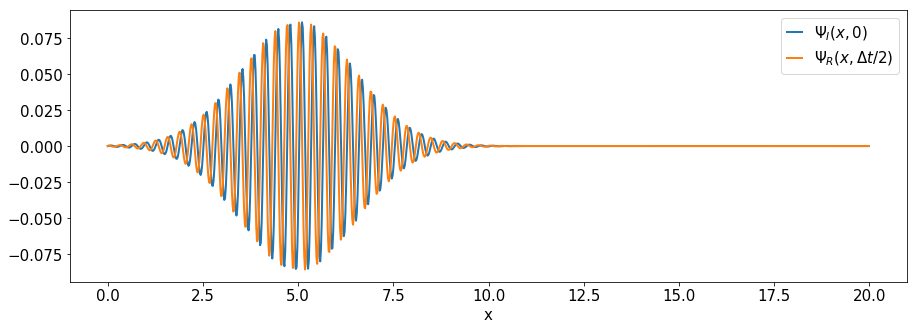

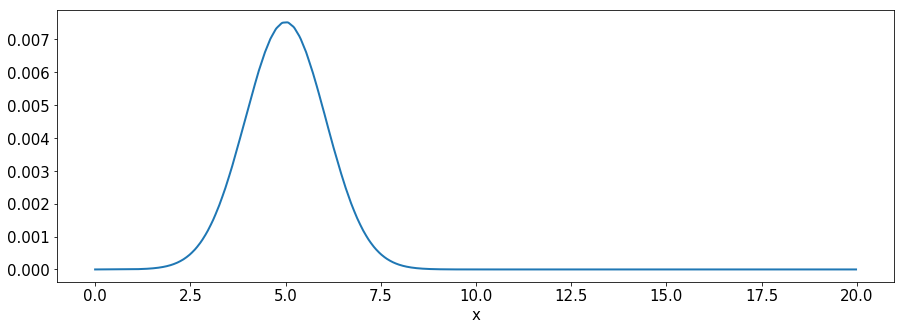

0.9999999999999996


In [66]:
sigma_x=1.5 #??
xs=5 #bare satte 5 fordi vi skal ha den verdien etterhvert
Nx= 1000

#finding E and omega based on forumula in text
E=(h_bar*k_0)**2/(2*m)
omega=E/h_bar


#Function to calculate imaginary part of psi
def find_psi_im(x,t):
    psi_i=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_i[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.sin(k_0*x[1:-1]-omega*t)
    psi_i=psi_i/np.linalg.norm(psi_i)/np.sqrt(2) #normalizing
    return psi_i

#function to calculate real part of psi 
def find_psi_re(x,t):
    psi_r=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_r[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.cos(k_0*x[1:-1]-omega*t)
    psi_r=psi_r/np.linalg.norm(psi_r)/np.sqrt(2) #normalizing
    return psi_r
    
#guessing a value for delta_t 
delta_t=0.00001

#defining delta_x 
"""stemmer dette? Er lengda på arrayene Nx+1??"""
delta_x= L/(Nx)    

#making a array of x-values from 0 to L
x=np.arange(0,L,delta_x)

#making arrays of initial values of psi_r(x,delta_t/2) and psi_i(x,0)
psi_i=find_psi_im(x,0)
psi_r=find_psi_re(x,delta_t/2)

#plotting
plt.title('')
plt.plot(x,psi_i,label=r'$\Psi_I(x,0)$')
plt.plot(x,psi_r,label=r'$\Psi_R(x,\Delta t /2)$')
plt.legend()
plt.xlabel('x')
plt.show()

"""ettersom vi har så liten delta_t, kanskje vi kan bruke de psi-ene vi har funnet????"""
psi_squared=psi_i**2+psi_r**2 
plt.plot(x,psi_squared)
plt.xlabel('x')
plt.show()

"""testet at den faktisk er normalisert"""
print(np.sum(psi_squared))



Here we have choosen the number of x-values, Nx, to be 1000 which gives a nice and smooth graph for $\Psi_I$ and $\Psi_R$. The smal differance in time between the to graphs does not make any significance at the plot and the probability density also has a smooth graph. The wave packet has a gausian shape and is located around $x_s$ which we have choosen to be 5.

In [ ]:
"""KRISTINE SE PÅ DETTE OG RYDD"""

xlen=Nx
tlen=Nx

dt=1e-10
dx=2e-06

V=np.zeros(len(x))

def next_psi(xarray,timesteps,psi_r_0,psi_i_0,dt,dx):
    psi_i=psi_i_0
    psi_r=psi_r_0
    for ti in range(timesteps):
        new_psi_i=np.zeros(len(psi_i))    
        new_psi_i[1:-1] = psi_i[1:-1] - delta_t *((V[1:-1]/h_bar*psi_r[1:-1]) - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
        psi_i=new_psi_i
        #print((psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2]))
        #print((psi_r[2:],2*psi_r[1:-1],psi_r[:-2]),"!!!!")
        #print(psi_r[500])
        new_psi_r=np.zeros(len(psi_r))
        new_psi_r[1:-1] = psi_r[1:-1] - delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
        psi_r=new_psi_r
        
    return psi_r,psi_i

plt.plot(x,psi_i)
plt.show()
#print((psi_r[2:],2*psi_r[1:-1],psi_r[:-2]),"!!!!")

for i in range(10):
    psi_r,psi_i=next_psi(x,1000,psi_r,psi_i,dt,delta_x)
    plt.plot(x,psi_i)
    plt.show()
"""
def find_next_psi(x,t):
    #psi_r=find_psi_re(x,t)
    for ti in range(t):
        for xi in range(len(x)):
            psi_i=find_psi_im(x,t-(delta_t/2))-dt*((V(x)/h_bar)*find_psi_re(x,t)-(h_bar/(2*m))*(find_psi_re(x+1,t)-2*find_psi_re(x,t)+find_psi_re(x-1,t))/(dx)**2)
            #last_psi_r=psi_r
            psi_r=find_psi_re(x,t)+dt*((V(x)/h_bar)*find_psi_im(x,t+1)-(h_bar/(2*m))*(find_psi_im(x+1,t+1)-2*find_psi_im(x,t+1)+find_psi_im(x-1,t+1))/(dx**2))
            #print(psi_r-last_psi_r)
            
    return psi_r,psi_i


psi_r,psi_i=find_next_psi(x,100)
plt.plot(x,psi_r)
 """
"""
Psi_i=np.zeros((xlen,tlen))
Psi_i[0]=psi_i

Psi_r=np.zeros((xlen,tlen))
Psi_r[0]=psi_r

#print(Psi_r,Psi_i)
dx=0.1
dt=0.1
def V(x):
    return 0

"psi_i og Psi_r er arrays"
def find_psi(Psi_i,Psi_r,xlen,dx,x0,tlen,dt,t0):
    for t in range(t0,tlen-1):
        #find next Psi_r
        for x in range(x0,xlen-1):
            Psi_r[x,t+1]=find_next_psi_re(x,t)
            Psi_i[x,t+1]=find_next_psi_im(x,t)
    return Psi_i,Psi_r

Psi_I,Psi_R=find_psi(Psi_i,Psi_r,xlen,0.1,5,tlen,0.1,0)  

#print(Psi_I,Psi_R)
"""


## problem 2
Now we want to study the propagation of the wave packet. 
The Scödringer Equation reads



From the Schödringer equation it can be derived a numerical propagation method. 

$
\Psi_I(x,t+\Delta t)= \Psi_I(x,t)-\Delta t \Big [ V(x)\Psi_R(x,t) -\frac{\hbar^2}{2m} \frac{\Psi_R(x,t-\frac{\Delta t)}{2}-2\Psi_R(x,t)+\Psi_R(x,t+\frac{\Delta t}{2})}{(\Delta x)^2}   \Big ]
$

and 

$
\Psi_R(x,t+\Delta t/2)= \Psi_R(x,t)+\Delta t \Big [ V(x)\Psi_I(x,t) -\frac{\hbar^2}{2m} \frac{\Psi_I(x,t-\Delta t)-2\Psi_I(x,t)+\Psi_I(x,t+\Delta t)}{(\Delta x)^2}   \Big ]
$

In [45]:
"""KRISTINE: jeg vet ikke hva dette er, skal vi bare fjerne hele cellen?"""
x_s=5
L=2*10
x_end=15

v_g=(h_bar*k_0)/m

T= L/(2*v_g)
print(v_g,T)

count=0
t0=0
x0=0

for t in range(t0,tlen-1):
    count+=1
    for X in range(x0,xlen-1):
        psi_i=find_next_psi_re(X,t)
        psi_r=find_next_psi_im(X,t)
    if count%10==0:
        print(psi_i)
        plt.plot(x,psi_i)
        plt.plot(x,psi_r)
    


20.0 0.5


NameError: name 'tlen' is not defined

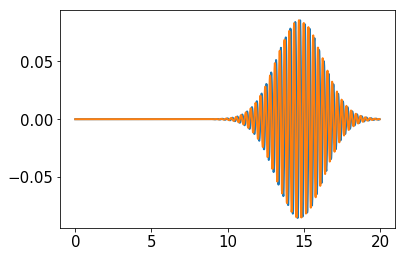

'Det ser ikke ut som den blir helt 15???'

In [67]:
%matplotlib inline

v_g=(h_bar*k_0)/m
T= L/(2*v_g)
timesteps=int(T/delta_t)

#setting the potensial to be zero 
V2=np.zeros(len(x)) 

#finding the inital values for psi_i and psi_r
psi_i=find_psi_im(x,0)
psi_r=find_psi_re(x,delta_t/2)


"""SIGRID rydd i disse to funksjonene!"""
#functions to update psi_r and psi_i
def newPsi_im(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_i=np.zeros(len(psi_i))
    #psi_i[1:-1] = psi_i[1:-1] - delta_t *((V[1:-1]/h_bar*psi_r[1:-1]) - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
    
    nextPsi_i[1:-1] = psi_i[1:-1] - delta_t *(V[1:-1]/h_bar*psi_r[1:-1] - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
    #print(psi_i[1],V[1],psi_r[2],psi_r[1],psi_r[0])
    #print(psi_i[1],V[1],psi_r[2],psi_r[1],psi_r[0])
    #psi_i=nextPsi_i
    #psi_i=psi_i/np.linalg.norm(psi_i)
    return nextPsi_i
                     
def newPsi_re(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_r=np.zeros(len(psi_r))
    #psi_r[1:-1] = psi_r[1:-1] - delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
    nextPsi_r[1:-1] = psi_r[1:-1] + delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
    #psi_r=nextPsi_r
    return nextPsi_r
    


"""Kanskje se litt på å ta inn array by referance ikke copy??"""
def propagate_psi(psi_i,psi_r,timesteps,V):
    for i in range(timesteps):
        psi_i=newPsi_im(psi_i,psi_r,delta_x,delta_t, V)
        psi_r=newPsi_re(psi_i,psi_r,delta_x,delta_t, V)
    return psi_i, psi_r


#run propagation
psi_i, psi_r = propagate_psi(psi_i,psi_r,timesteps,V2)
    
    
#plotting 
plt.plot(x,psi_i)
plt.plot(x,psi_r)
plt.show()

"""Det ser ikke ut som den blir helt 15???"""


In [ ]:
#plotting for different values of sigma_x
sigma_xs=[0.5,1,2]
psi_squared_list=[]
for i in range(len(sigma_xs)):
    sigma_x=sigma_xs[i]
    
    #finding initial values: 
    psi_i=find_psi_im(x,0)
    psi_r=find_psi_re(x,delta_t/2)
    
    psi_i,psi_r = propagate_psi(timesteps,psi_i,psi_r)
    
    #calculating the probability density and adding to a list such that it can be plotted later
    psi_squared_list.append(psi_i**2+psi_r**2)
       
    print("sigma_x =",sigma_x)
    plt.plot(x,psi_i)
    plt.plot(x,psi_r)
    plt.show()
    
#plotting the probability density psi_squared
plt.plot(x,psi_squared_list[0], label=r'$\psi^2$ for $\sigma_x=0.5')
plt.plot(x,psi_squared_list[1], label=r'$\psi^2$ for $\sigma_x=1')
plt.legend()
plt.show()


"""MANGLER: test for ulike verdier av delta_t og finn et passende valg"""

In [ ]:
#making animation: (funker ikke enda) 
%matplotlib notebook
    
def animate_psi_im(i): 
    for i in range(10):
        psi_i=newPsi_im(psi_i,psi_r,delta_x,delta_t,V2)
        psi_r=newPsi_re(psi_i,psi_r,delta_x,delta_t,V2)
    line.set_ydata(psi_i)
    return line

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


fig, ax = plt.subplots()
line, = ax.plot(x, psi_i)
ani = animation.FuncAnimation(fig, animate_psi_im, init_func=init, frames=100, interval=20, blit=True)
plt.show()

## problem 3

In [ ]:
%matplotlib inline
l=L/50
V0=E/2
sigma_x=1

def V(x,V_0,l):
    if (L/2-l/2<x) or (L/2+l/2>x):
        return V_0
    else: 
        return 0 

#defing the potensial
V3= V(x,V0,l)

#initial values for psi_i and psi_r: 
psi_i=find_psi_im(x,0)
psi_r=find_psi_re(x,delta_t/2)

psi_i, psi_r = propagate_psi(psi_i,psi_r,timesteps,V3)

#plotting
plt.plot(x,psi_i)



"""MANGLER: 
-fiks potensialet 
-regn ut transmisjonssannsynligheten
"""

## problem 4

In [ ]:
"Making a list of 50 different values of V0"
V0_list=np.linspace(0,(3*E)/2,50)


## problem 5

In [ ]:
"Making a list of 50 different values of L"
L_list=np.linspace(0,L/20,50)


## Animasjuun


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

#rc('animation', html='html5')
#rc('animation', html='jshtml')
HTML(anim.to_html5_video())

anim.save('filename.gif', writer='imagemagic')

from IPython.display import Image
with open('filename.gif','rb') as file:
    display(Image(file.read()), format='png')